In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [43]:
# Initialize DataFrame
df = pd.read_csv(r"..\bank_datasets\bank.csv")
df['deposit'].value_counts()/len(df['deposit'])  # Check if the classification values are balanced

deposit
no     0.52616
yes    0.47384
Name: count, dtype: float64

In [44]:
def capitalize(data : str):
    return data.title()

def remove_dots(data : str):
    return data.replace(".", "")

def create_age_groups(data : int):
    if data >= 18 and data < 40:
        return 'Young Adult'
    if data >= 40 and data < 60:
        return 'Middle Aged'
    else:
        return 'Elderly'
    
def sale_made(data : str):
    if data.lower() == 'yes':
        return 1
    else:
        return 0

# Capitalize column values
df['month'] = df['month'].apply(capitalize)
df['job'] = df['job'].apply(capitalize)

df['job'] = df['job'].apply(remove_dots)  # Remove dots from job titles
df['age_group'] = df['age'].apply(create_age_groups)  # Create age groups
df['customer_id'] = df.index + 1  # Create customer ID
df['sale'] = df['deposit'].apply(sale_made)  # Record if a sale was made (if customer subscribed)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_group,customer_id,sale
0,59,Admin,married,secondary,no,2343,yes,no,unknown,5,May,1042,1,-1,0,unknown,yes,Middle Aged,1,1
1,56,Admin,married,secondary,no,45,no,no,unknown,5,May,1467,1,-1,0,unknown,yes,Middle Aged,2,1
2,41,Technician,married,secondary,no,1270,yes,no,unknown,5,May,1389,1,-1,0,unknown,yes,Middle Aged,3,1
3,55,Services,married,secondary,no,2476,yes,no,unknown,5,May,579,1,-1,0,unknown,yes,Middle Aged,4,1
4,54,Admin,married,tertiary,no,184,no,no,unknown,5,May,673,2,-1,0,unknown,yes,Middle Aged,5,1


In [45]:
# Create a date column
def append_to_column(data):
    return f"{data}-"

def convert_month_to_num(data : str):
    data = data.strip().lower()
    if data == "jan":
        return f"1-2024"
    elif data == "feb":
        return f"2-2024"
    elif data == "mar":
        return f"3-2024"
    elif data == "apr":
        return f"4-2024"
    elif data == "may":
        return f"5-2024"
    elif data == "jun":
        return f"6-2024"
    elif data == "jul":
        return f"7-2024"
    elif data == "aug":
        return f"8-2024"
    elif data == "sep":
        return f"9-2024"
    elif data == "oct":
        return f"10-2024"
    elif data == "nov":
        return f"11-2024"
    else:
        return f"12-2024"
    
def make_positive(data : int):
    return abs(data)

df['contact_date'] = df['day'].apply(append_to_column)

df['contact_date'] += df['month'].apply(convert_month_to_num)

df['pdays'] = df['pdays'].apply(make_positive)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,deposit,age_group,customer_id,sale,contact_date
0,59,Admin,married,secondary,no,2343,yes,no,unknown,5,...,1042,1,1,0,unknown,yes,Middle Aged,1,1,5-5-2024
1,56,Admin,married,secondary,no,45,no,no,unknown,5,...,1467,1,1,0,unknown,yes,Middle Aged,2,1,5-5-2024
2,41,Technician,married,secondary,no,1270,yes,no,unknown,5,...,1389,1,1,0,unknown,yes,Middle Aged,3,1,5-5-2024
3,55,Services,married,secondary,no,2476,yes,no,unknown,5,...,579,1,1,0,unknown,yes,Middle Aged,4,1,5-5-2024
4,54,Admin,married,tertiary,no,184,no,no,unknown,5,...,673,2,1,0,unknown,yes,Middle Aged,5,1,5-5-2024


In [46]:
# Drop irrelevant columns (previous dates)
df = df.drop('day', axis=1)
df = df.drop('month', axis=1)
df['contact_date'] = pd.to_datetime(df['contact_date'], format="%d-%m-%Y")  # Convert contact_date to datetime
df.dtypes

age                      int64
job                     object
marital                 object
education               object
default                 object
balance                  int64
housing                 object
loan                    object
contact                 object
duration                 int64
campaign                 int64
pdays                    int64
previous                 int64
poutcome                object
deposit                 object
age_group               object
customer_id              int64
sale                     int64
contact_date    datetime64[ns]
dtype: object

In [47]:
# Create feature (X) and target (y) datasets
X = df.drop('deposit', axis=1)
y = df['sale']

# Rename columns for clarity
X.rename(columns={
    'default' : 'credit_on_default',
    'balance' : 'annual_balance',
    'housing' : 'housing_loan',
    'loan': 'personal_loan',
    'contact' : 'contact_type',
    'duration' : 'contact_duration',
    'campaign' : 'campaign_contacts',
    'pdays' : 'days_last_contacted',
    'previous' : "previous_contacts"
}, inplace=True)

# Create separate DataFrame for analysis
analysis_df = pd.DataFrame(X)
analysis_df['deposit'] = y

# Customer (Dim) -> customer_id, age, job, marital, education, age_group
# Accounts (Dim) -> customer_id, credit_on_default, annual_balance, housing_loan, personal_loan
# Sales (Fact) -> customer_id, contact_type, contact_day, contact_month, contact_duration, campaign_contacts, days_last_contacted, previous_contacts, poutcome, sale, deposit

# Create tables for analysis
customer_table = analysis_df[['customer_id', 'contact_date', 'age', 'job', 'marital', 'education', 'age_group']]
accounts_table = analysis_df[['customer_id', 'contact_date', 'credit_on_default', 'annual_balance', 'housing_loan', 'personal_loan']]
sales_table = analysis_df[['customer_id', 'contact_date', 'contact_type', 'contact_duration', 'campaign_contacts', 'days_last_contacted', 'previous_contacts', 'poutcome', 'sale', 'deposit']]

# Save DataFrames
customer_table.to_csv(r"../bank_datasets/customers.csv", index=False)
accounts_table.to_csv(r"../bank_datasets/accounts.csv", index=False)
sales_table.to_csv(r"../bank_datasets/sales.csv", index=False)

analysis_df.head()

,age,job,marital,education,credit_on_default,annual_balance,housing_loan,personal_loan,contact_type,contact_duration,campaign_contacts,days_last_contacted,previous_contacts,poutcome,age_group,customer_id,sale,contact_date,deposit
0,59,Admin,married,secondary,no,2343,yes,no,unknown,1042,1,1,0,unknown,Middle Aged,1,1,2024-05-05,1
1,56,Admin,married,secondary,no,45,no,no,unknown,1467,1,1,0,unknown,Middle Aged,2,1,2024-05-05,1
2,41,Technician,married,secondary,no,1270,yes,no,unknown,1389,1,1,0,unknown,Middle Aged,3,1,2024-05-05,1
3,55,Services,married,secondary,no,2476,yes,no,unknown,579,1,1,0,unknown,Middle Aged,4,1,2024-05-05,1
4,54,Admin,married,tertiary,no,184,no,no,unknown,673,2,1,0,unknown,Middle Aged,5,1,2024-05-05,1


In [48]:
X.head()

,age,job,marital,education,credit_on_default,annual_balance,housing_loan,personal_loan,contact_type,contact_duration,campaign_contacts,days_last_contacted,previous_contacts,poutcome,age_group,customer_id,sale,contact_date
0,59,Admin,married,secondary,no,2343,yes,no,unknown,1042,1,1,0,unknown,Middle Aged,1,1,2024-05-05
1,56,Admin,married,secondary,no,45,no,no,unknown,1467,1,1,0,unknown,Middle Aged,2,1,2024-05-05
2,41,Technician,married,secondary,no,1270,yes,no,unknown,1389,1,1,0,unknown,Middle Aged,3,1,2024-05-05
3,55,Services,married,secondary,no,2476,yes,no,unknown,579,1,1,0,unknown,Middle Aged,4,1,2024-05-05
4,54,Admin,married,tertiary,no,184,no,no,unknown,673,2,1,0,unknown,Middle Aged,5,1,2024-05-05


In [49]:
X['deposit'] = y  # Add y for grouping jobs with most subscriptions
job_group = X.groupby(by=X['deposit'])  # Group X by target variable
jobs_with_most_subs = job_group['job'].value_counts(ascending=False)[12:17]  # Get top 5 jobs with the most subsciptions

print(f"Jobs with the most subscriptions are: {jobs_with_most_subs}")

X.drop(columns=['contact_date', 'deposit', 'customer_id', 'sale'], axis=1, inplace=True)  # Remove unnecessary columns from dataset

Jobs with the most subscriptions are: deposit  job        
1        Management     1301
         Technician      840
         Blue-Collar     708
         Admin           631
         Retired         516
Name: count, dtype: int64


In [50]:
# Define categorical columns
cat_columns = [
    "job",
    "marital",
    "education",
    "credit_on_default",
    "housing_loan",
    "personal_loan",
    "contact_type",
    "poutcome",
    "age_group"
]

X = pd.get_dummies(X, drop_first=False, columns=cat_columns)  # One hot encode feature values

X.head()

,age,annual_balance,contact_duration,campaign_contacts,days_last_contacted,previous_contacts,job_Admin,job_Blue-Collar,job_Entrepreneur,job_Housemaid,...,contact_type_cellular,contact_type_telephone,contact_type_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age_group_Elderly,age_group_Middle Aged,age_group_Young Adult
0,59,2343,1042,1,1,0,True,False,False,False,...,False,False,True,False,False,False,True,False,True,False
1,56,45,1467,1,1,0,True,False,False,False,...,False,False,True,False,False,False,True,False,True,False
2,41,1270,1389,1,1,0,False,False,False,False,...,False,False,True,False,False,False,True,False,True,False
3,55,2476,579,1,1,0,False,False,False,False,...,False,False,True,False,False,False,True,False,True,False
4,54,184,673,2,1,0,True,False,False,False,...,False,False,True,False,False,False,True,False,True,False


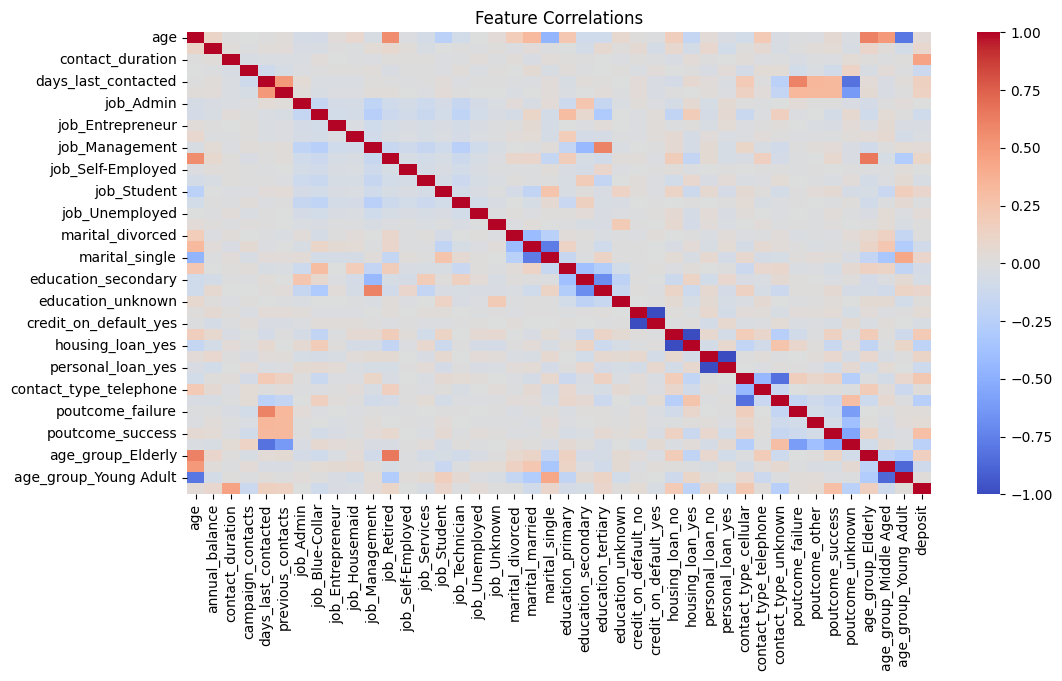

In [51]:
# Create correlation map
corr_map = X
corr_map['deposit'] = y  # Add deposit to corr map to compare feature correlations
corr_map = X.corr()

# Plot heatmap of X data
plt.figure(figsize=(12, 6))
sns.heatmap(corr_map, annot=False, cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()

In [52]:
sorted_corrs = corr_map['deposit'].sort_values(ascending=False)  # Sort correlations to target in descending order

# Get top 3 highest and lowest correlations to target
top_feature_corrs = sorted_corrs[1:4]
least_feature_corrs = sorted_corrs[-3:]

# Convert into list
top_feature_corrs = list(top_feature_corrs.index)
least_feature_corrs = list(least_feature_corrs.index)

print(f"Top 3 highest correlations to target: {top_feature_corrs}\n")
print(f"Top 3 lowest correlations to target: {least_feature_corrs}\n")

X.drop('deposit', axis=1, inplace=True)  # Remove target variable from X

Top 3 highest correlations to target: ['contact_duration', 'poutcome_success', 'contact_type_cellular']

Top 3 lowest correlations to target: ['housing_loan_yes', 'poutcome_unknown', 'contact_type_unknown']



In [53]:
# Upload processed data into csv files

X.to_csv(r'features.csv', index=False)
y.to_csv(r'target.csv', index=False)